# Imports

In [72]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from pandas import DataFrame

In [73]:
# read in data
data = pd.read_csv('working_data/data.csv')
no_outliers = pd.read_csv('working_data/no_outliers.csv')

# Convert Data to Numerical

In [74]:
# Convert Label column to numerical values. 1 if botnet, 0 if benign. 

# create a list of all the labels
label_entries = list(no_outliers['Label'])

#create lists for storing botnet and benign flows
botnets = list()
benign = list()

#convert botnet entries to 1, benign to 0
index = 0
for entry in no_outliers['Label']:
    # non-TCP and UDP protocols are outliers too, so remove them
    if not 'TCP' in entry and not 'UDP' in entry:
        label_entries[index] = -1
    else:
        if 'botnet' in entry or 'Botnet' in entry:
            label_entries[index] = 1

        else:
            if not entry == 1 and not entry == 0:
                label_entries[index] = 0
    index += 1
        
no_outliers['Label'] = label_entries

# Visualize Data

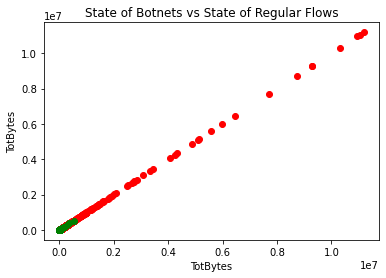

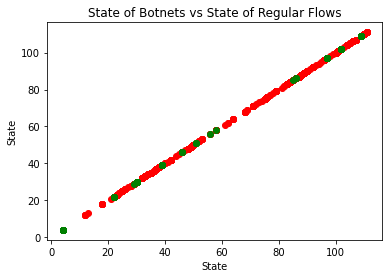

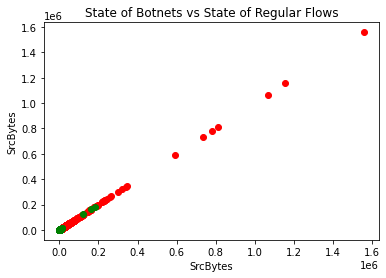

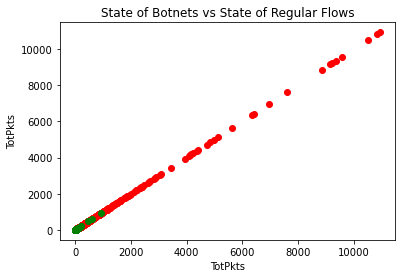

In [75]:
from matplotlib import pyplot as plt
# TotBytes
plt.title("State of Botnets vs State of Regular Flows")
plt.xlabel("TotBytes")
plt.ylabel("TotBytes")
plt.scatter(no_outliers.loc[no_outliers['Label'] == 0]['TotBytes'],no_outliers.loc[no_outliers['Label'] == 0]['TotBytes'],color='red')
plt.scatter(no_outliers.loc[no_outliers['Label'] == 1]['TotBytes'],no_outliers.loc[no_outliers['Label'] == 1]['TotBytes'],color='green')
plt.show()

plt.title("State of Botnets vs State of Regular Flows")
plt.xlabel("State")
plt.ylabel("State")
plt.scatter(no_outliers.loc[no_outliers['Label'] == 0]['State'],no_outliers.loc[no_outliers['Label'] == 0]['State'],color='red')
plt.scatter(no_outliers.loc[no_outliers['Label'] == 1]['State'],no_outliers.loc[no_outliers['Label'] == 1]['State'],color='green')
plt.show()

plt.title("State of Botnets vs State of Regular Flows")
plt.xlabel("SrcBytes")
plt.ylabel("SrcBytes")
plt.scatter(no_outliers.loc[no_outliers['Label'] == 0]['SrcBytes'],no_outliers.loc[no_outliers['Label'] == 0]['SrcBytes'],color='red')
plt.scatter(no_outliers.loc[no_outliers['Label'] == 1]['SrcBytes'],no_outliers.loc[no_outliers['Label'] == 1]['SrcBytes'],color='green')
plt.show()

plt.title("State of Botnets vs State of Regular Flows")
plt.xlabel("TotPkts")
plt.ylabel("TotPkts")
plt.scatter(no_outliers.loc[no_outliers['Label'] == 0]['TotPkts'],no_outliers.loc[no_outliers['Label'] == 0]['TotPkts'],color='red')
plt.scatter(no_outliers.loc[no_outliers['Label'] == 1]['TotPkts'],no_outliers.loc[no_outliers['Label'] == 1]['TotPkts'],color='green')
plt.show()

# K-Means Clustering

In [76]:
from sklearn.cluster import KMeans

#get all the features except StartTime and Label
x = no_outliers.iloc[:,1:14]


In [77]:
#counts the number of botnets and benign flows in each cluster, given a list of the labels and the # clusters
def count_groups(n, labels, centroids):
    print( n)
    # Make a list of dictionaries for storing counts of botnet and benign flows for each cluster
    counts = list()
    for index in range(0, n):
        counts.append( {'botnet': 0, 'benign': 0, 'label': 0, 'centroid': list()} )

    #Iterate through each individual cluster
    for index in range(0, len(labels)):
    
        
        # if it's benign
        if int(no_outliers['Label'][index]) == 0:
            # Find the cluster the data point belongs to, update its corresponding entry in counts
            counts[labels[index]]['benign'] += 1
            
        # if it's a botnet
        else:
            counts[labels[index]]['botnet'] += 1
        counts[labels[index]]['label'] = labels[index]
        counts[labels[index]]['centroid'] = centroids[labels[index]]
            
    return counts


# # Test on 1 - 50 Clusters
# NUM_CLUSTERS = 50
# for num in range(10, NUM_CLUSTERS + 1, 10):
#     kmeans = KMeans(n_clusters=num)
#     kmeans.fit(x)
# #     identified_clusters = kmeans.fit_predict(x)
#     labels = kmeans.labels_
#     centroids = kmeans.cluster_centers_
#     clusters_set = count_groups(num, labels, centroids)


# # Plot the botnet vs benign for each cluster
# for n in range(10, len(clusters_set)+1, 10):
#     print(n)
#     for cluster in range(1, n):
#         plt.scatter(clusters_set[cluster]['botnet'], clusters_set[cluster]['benign'])
#     plt.show()






In [78]:
# # List Clusters
# NUM_CLUSTERS = 50
# for num in range(10, NUM_CLUSTERS + 1, 10):
#     kmeans = KMeans(n_clusters=num)
#     kmeans.fit(x)
#     centroids  = kmeans.cluster_centers_
#     print("%d clusters, centroids: " % (num))
#     print(centroids)

In [79]:
# prints out the number of botnet or benign flows in each cluster

kmeans = KMeans(n_clusters=30)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
clusters_set = count_groups(30, labels, centroids)
for cluster in clusters_set:
#     print(cluster['botnet'])
    print(cluster['benign'])  

30
51548
224
1043
2496
339
1050
4638
2839
1178
1023
1027
7683
1281
4231
803
643
407
292
1873
36122
2298
765
13315
110
1078
1139
83
23564
3965
397


In [80]:
print(len(clusters_set))

30


In [82]:
# Find silhouette values for various numbers of clusters
from sklearn.metrics import silhouette_score

NUM_CLUSTERS=50
for num in range(10, NUM_CLUSTERS + 1, 10):
    kmeans = KMeans(n_clusters=num)
    kmeans.fit(x)
    labels=kmeans.labels_
    silhouette = silhouette_score(x, labels)
    print("%d clusters, silhouette score: %f" % (num, silhouette))
        

10 clusters, silhouette score: 0.770628
20 clusters, silhouette score: 0.624039
30 clusters, silhouette score: 0.726986
40 clusters, silhouette score: 0.735992
50 clusters, silhouette score: 0.773784


# Useful Resources:

https://www.geeksforgeeks.org/convert-a-categorical-variable-into-dummy-variables/?ref=rp